# Multiple Linear Regression

Multiple linear regression is conducted when we want to infer / predict a particular value y from a linear combination of several features X. For example, we want to predict how much sales revenue we will get from a combination of different advertisement channels; or we want to predict exam scores based on a combination of factors such as study time, number of practice tests taken, or location of the school district.

## Advertising Profit Dataset

### Import related python libraries

In [8]:
## basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

### Import dataset, split into training & test sets

Before importing the dataset, it's good to look at it using a spreadsheet program or any other program that can read CSV files. Get a sense of how large the data is, how many features there are, and how you would tackle the data at hand.

In [40]:
##import advertising dataset, preview using pandas head
df = pd.read_csv('datasets/advertising.csv')
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [44]:
## Split data into X and y numpy arrays
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Get shape of dataset
print(f'Number of data points: {X.shape[0]}')
print(f'Number of features: {X.shape[1]}')

## Print first 5 rows of X and y, compare with pandas head to make sure split is correct
print(f'First 5 rows of X:\n{X[:5]}')
print(f'First 5 rows of y:\n{y[:5]}')

## Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Get shape of training and test sets
print(f'Number of training data points: {X_train.shape[0]}')
print(f'Number of test data points: {X_test.shape[0]}')

## Print first 5 rows of X_train and y_train
print(f'First 5 rows of X_train:\n{X_train[:5]}')
print(f'First 5 rows of y_train:\n{y_train[:5]}')


Number of data points: 200
Number of features: 4
First 5 rows of X:
[[  1.  230.1  37.8  69.2]
 [  2.   44.5  39.3  45.1]
 [  3.   17.2  45.9  69.3]
 [  4.  151.5  41.3  58.5]
 [  5.  180.8  10.8  58.4]]
First 5 rows of y:
[22.1 10.4  9.3 18.5 12.9]
Number of training data points: 160
Number of test data points: 40
First 5 rows of X_train:
[[ 80.  116.    7.7  23.1]
 [198.  177.    9.3   6.4]
 [ 39.   43.1  26.7  35.1]
 [ 25.   62.3  12.6  18.3]
 [123.  224.    2.4  15.6]]
First 5 rows of y_train:
[11.  12.8 10.1  9.7 11.6]


### Train & test the model

In [50]:
## Create linear regression model
model = LinearRegression()

## Fit model to training data
model.fit(X_train, y_train)

## Get model coefficients
print(f'Coefficients: {model.coef_}')

## Get model intercept
print(f'Intercept: {model.intercept_}')

## Get model predictions on training data
y_train_pred = model.predict(X_train)

## Get model predictions on test data
y_test_pred = model.predict(X_test)

## Get model performance on training data
print(f'Training MSE: {mean_squared_error(y_train, y_train_pred)}')

## Get model performance on test data
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

## Get model performance on training data
print(f'Training RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred))}')

## Get model performance on test data
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred))}')

## Get model performance on training data
print(f'Training R^2: {model.score(X_train, y_train)}')

## Get model performance on test data
print(f'Test R^2: {model.score(X_test, y_test)}')

Coefficients: [0.   0.04 0.19 0.  ]
Intercept: 2.9065270863618
Training MSE: 2.7037165989728713
Test MSE: 3.1990044685888988
Training RMSE: 1.644298208650995
Test RMSE: 1.788576100865965
Training R^2: 0.8957553000540606
Test R^2: 0.8986489151417082


### Visualize the training and test set predictions & residuals

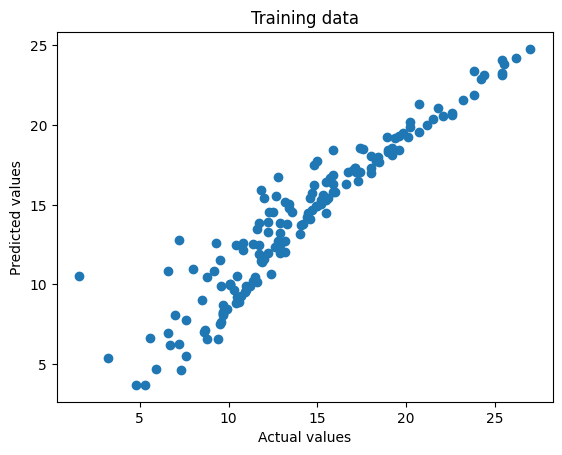

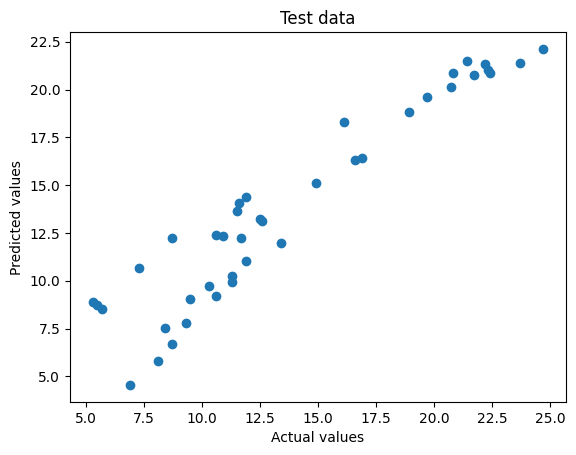

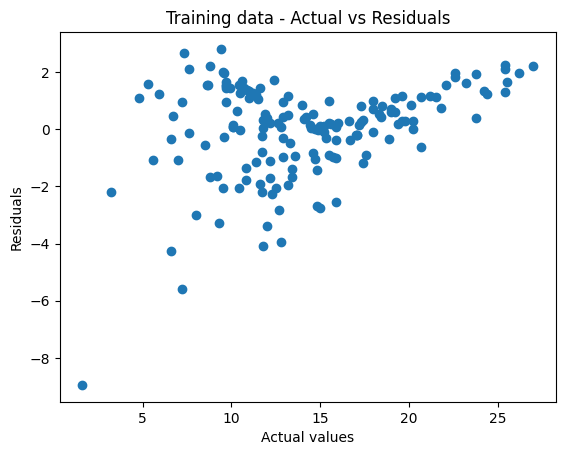

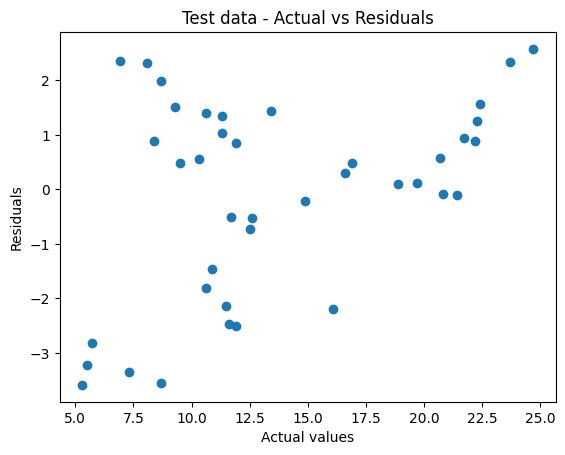

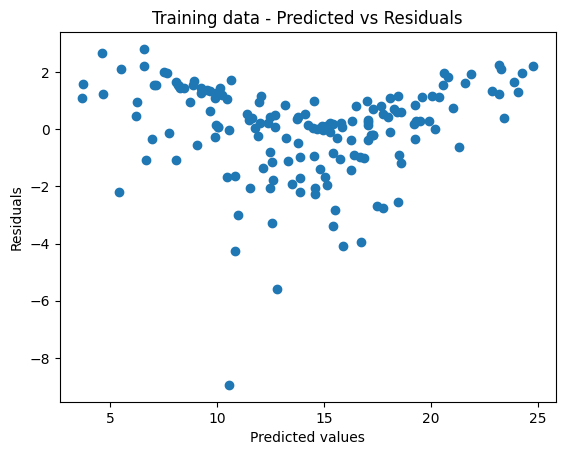

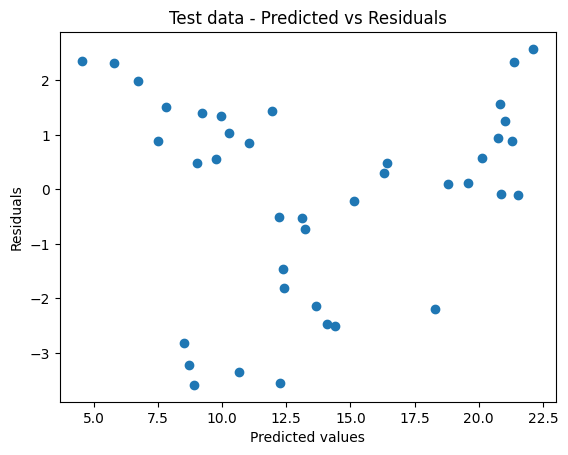

In [54]:
## Plot model predictions vs actual values on training data
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.show()

## Plot model predictions vs actual values on test data
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Test data')
plt.show()

## Plot model residuals vs actual values on training data
plt.scatter(y_train, y_train - y_train_pred)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Training data - Actual vs Residuals')
plt.show()

## Plot model residuals vs actual values on test data
plt.scatter(y_test, y_test - y_test_pred)
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Test data - Actual vs Residuals')
plt.show()

## Plot model residuals vs predicted values on training data
plt.scatter(y_train_pred, y_train - y_train_pred)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Training data - Predicted vs Residuals')
plt.show()

## Plot model residuals vs predicted values on test data
plt.scatter(y_test_pred, y_test - y_test_pred)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Test data - Predicted vs Residuals')
plt.show()

In [53]:
## print actual vs predicted values on test data
y_out_advert = np.concatenate((y_test.reshape(-1,1), y_test_pred.reshape(-1,1)), axis=1)
print(f'Actual vs Predicted Sales:\n{y_out_advert}')

Actual vs Predicted Sales:
[[16.9  16.41]
 [22.4  20.84]
 [21.4  21.51]
 [ 7.3  10.65]
 [24.7  22.12]
 [12.6  13.12]
 [22.3  21.04]
 [ 8.4   7.5 ]
 [11.5  13.65]
 [14.9  15.12]
 [ 9.5   9.02]
 [ 8.7   6.71]
 [11.9  14.4 ]
 [ 5.3   8.89]
 [10.3   9.74]
 [11.7  12.22]
 [ 5.5   8.71]
 [16.6  16.29]
 [11.3  10.27]
 [18.9  18.8 ]
 [19.7  19.59]
 [12.5  13.22]
 [10.9  12.36]
 [22.2  21.31]
 [ 9.3   7.8 ]
 [ 8.1   5.78]
 [21.7  20.75]
 [13.4  11.95]
 [10.6   9.2 ]
 [ 5.7   8.52]
 [10.6  12.4 ]
 [11.3   9.95]
 [23.7  21.37]
 [ 8.7  12.25]
 [16.1  18.3 ]
 [20.7  20.13]
 [11.6  14.07]
 [20.8  20.89]
 [11.9  11.05]
 [ 6.9   4.55]]


## Startup Profit Dataset

### Import related python libraries.

In [55]:
## basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


### Import dataset, split into training & test sets

Before importing the dataset, it's good to look at it using a spreadsheet program or any other program that can read CSV files. Get a sense of how large the data is, how many features there are, and how you would tackle the data at hand.

Specific to the startup dataset, we need to do one hot encoding on the categorical feature before splitting the data set into training and test sets.

In [56]:
## import the data set into pandas DataFrame and split into numpy arrays
dataset = pd.read_csv('datasets/startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Get a brief peak at the data
print(f'Number of data points: {X.shape[0]}')
print(f'Number of features: {X.shape[1]}')
feature_titles = ['R&D Spending', 'Administration','Marketing','State']
print(f'Feature Titles: {feature_titles}')
print(f'Example data point: {X[0]}')

## Since 1 one the features is categorical (State), we need to do one hot encoding beforehand
## We will use the ColumnTransformer class from the sklearn.compose module
## We will use the OneHotEncoder class from the sklearn.preprocessing module
## We will use the fit_transform method to fit the OneHotEncoder to the categorical feature and transform the feature
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(f'First five data points from X: {X[:5,:]}')
print(f'First five data points from y: {y[:5]}')
print(f'Feature Titles: {ct.get_feature_names_out()}')


Number of data points: 50
Number of features: 4
Feature Titles: ['R&D Spending', 'Administration', 'Marketing', 'State']
Example data point: [165349.2 136897.8 471784.1 'New York']
First five data points from X: [[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]
First five data points from y: [192261.83 191792.06 191050.39 182901.99 166187.94]
Feature Titles: ['encoder__x3_California' 'encoder__x3_Florida' 'encoder__x3_New York'
 'remainder__x0' 'remainder__x1' 'remainder__x2']


In [57]:
## Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Get a preview of the training and test set
print(f'Number of training data: {X_train.shape[0]}')
print(f'Number of test data: {X_test.shape[0]}')
print(f'First five data points from X_train: {X_train[:5,:]}')
print(f'First five data points from y_train: {y_train[:5]}')

Number of training data: 40
Number of test data: 10
First five data points from X_train: [[0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [1.0 0.0 0.0 44069.95 51283.14 197029.42]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]]
First five data points from y_train: [141585.52 166187.94  89949.14 152211.77 182901.99]


### Train & test the model

Actual Profit vs Predicted Profit:
 [[134307.35 126362.88]
 [ 81005.76  84608.45]
 [ 99937.59  99677.49]
 [ 64926.08  46357.46]
 [125370.37 128750.48]
 [ 35673.41  50912.42]
 [105733.54 109741.35]
 [107404.34 100643.24]
 [ 97427.84  97599.28]
 [122776.86 113097.43]]
Mean Squared Error: 82010363.04500768


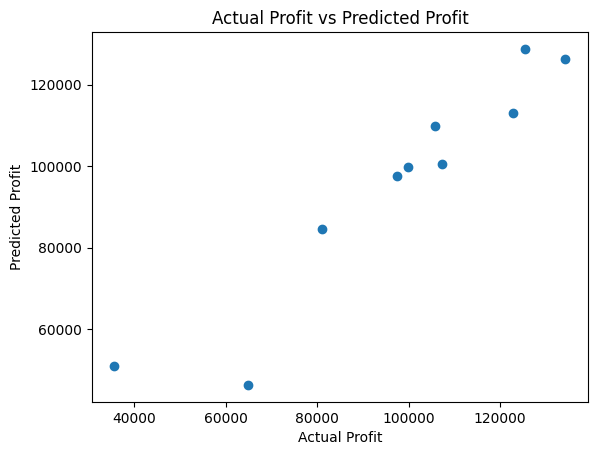

In [58]:
my_model = LinearRegression()
my_model.fit(X_train,y_train)
y_pred = my_model.predict(X_test)


np.set_printoptions(precision=2)
y_out = np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1),),1)

print(f'Actual Profit vs Predicted Profit:\n {y_out}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')


## Visualize the results
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual Profit vs Predicted Profit')
plt.show()

